# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [14]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass

# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
api_key = getpass()

In [20]:
# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period


In [27]:
#import json
#with open('output.json', 'w') as json_file:
#    json.dump(data, json_file)

In [2]:
import json 
# Run this code just in case you have output.json
with open('output.json', 'r') as json_file:
    # Load the JSON data into a Python object
    data = json.load(json_file)

In [3]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [4]:
from src.utils import get_a_random_chunk_property

In [5]:
get_a_random_chunk_property(data)

date: 2022-11-24
NEO name: (2022 XS)
neo_reference_id: 54332004


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

In [6]:
import json
import pandas as pd


flattened_data = []
for dff in data:
    near_earth_objects = dff["near_earth_objects"]

    for date, objects in near_earth_objects.items():
        for obj in objects:
            obj["close_approach_date"] = date
            flattened_data.append(obj)

main_df = pd.json_normalize(flattened_data)

main_df.head()

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,close_approach_date,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max
0,2216523,2216523,216523 (2001 HY7),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523,20.70,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,2022-01-07,http://api.nasa.gov/neo/rest/v1/neo/2216523?ap...,0.192555,0.430566,192.555078,430.566244,0.119648,0.267541,631.742403,1412.618957
1,2494697,2494697,494697 (2004 SW55),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2494697,20.77,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,2022-01-07,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.907760,0.115853,0.259054,611.702179,1367.807655
2,2496860,2496860,496860 (1999 XL136),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2496860,19.68,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,2022-01-07,http://api.nasa.gov/neo/rest/v1/neo/2496860?ap...,0.308003,0.688716,308.003021,688.715693,0.191384,0.427948,1010.508632,2259.565994
3,3311963,3311963,(2006 AL4),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3311963,24.92,False,"[{'close_approach_date': '2022-01-07', 'close_...",False,2022-01-07,http://api.nasa.gov/neo/rest/v1/neo/3311963?ap...,0.027578,0.061665,27.577505,61.665176,0.017136,0.038317,90.477382,202.313578
4,3401388,3401388,(2008 CO),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3401388,22.60,False,"[{'close_approach_date': '2022-01-07', 'close_...",False,2022-01-07,http://api.nasa.gov/neo/rest/v1/neo/3401388?ap...,0.080270,0.179490,80.270317,179.489885,0.049878,0.111530,263.354066,588.877594


In [7]:
import pandas as pd

# Assuming you have already fetched the data and stored it in the 'data' list

# Initialize lists to store the extracted information
date_list = []
neo_name_list = []
neo_size_list = []
is_hazardous_list = []
close_approach_distance_list = []

# Iterate over the fetched data and extract the required information
for week_data in data:
    for date, neo_data in week_data['near_earth_objects'].items():
        for neo in neo_data:
            date_list.append(date)
            neo_name_list.append(neo['name'])
            neo_size_list.append(neo['estimated_diameter']['kilometers']['estimated_diameter_max'])
            is_hazardous_list.append(neo['is_potentially_hazardous_asteroid'])

            close_approach_data = neo['close_approach_data']
            for approach in close_approach_data:
                miss_distance = approach['miss_distance']
                close_approach_distance_list.append(miss_distance['kilometers'])

# Create a DataFrame from the extracted information
df = pd.DataFrame({
    'Date': date_list,
    'NEO Name': neo_name_list,
    'NEO Size (km)': neo_size_list,
    'Is Potentially Hazardous': is_hazardous_list,
    'Close Approach Distance (km)': close_approach_distance_list
})

# Convert 'Close Approach Distance (km)' column to float
df['Close Approach Distance (km)'] = df['Close Approach Distance (km)'].astype(float)

# Format the 'Close Approach Distance (km)' column
df['Close Approach Distance (km)'] = df['Close Approach Distance (km)'].apply(lambda x: f'{x:,.2f}')

# Display the resulting DataFrame
print(df)



            Date             NEO Name  NEO Size (km)   
0     2022-01-07    216523 (2001 HY7)       0.430566  \
1     2022-01-07   494697 (2004 SW55)       0.416908   
2     2022-01-07  496860 (1999 XL136)       0.688716   
3     2022-01-07           (2006 AL4)       0.061665   
4     2022-01-07            (2008 CO)       0.179490   
...          ...                  ...            ...   
7946  2022-12-31            (2023 AW)       0.042271   
7947  2022-12-31           (2023 AC2)       0.077990   
7948  2022-12-31            (2023 BE)       0.078350   
7949  2022-12-31           (2023 BJ2)       0.092478   
7950  2022-12-31           (2023 BH4)       0.154896   

      Is Potentially Hazardous Close Approach Distance (km)  
0                         True                58,057,610.95  
1                         True                20,026,765.13  
2                         True                13,396,081.45  
3                        False                14,239,203.68  
4                

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [17]:
# Calculate the average size og the NEOs for each day

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the average NEO Size for each day
df['Average NEO Size'] = df.groupby('Date')['NEO Size (km)'].transform('mean')

# Display the updated DataFrame
#print(df)

# Calculate the average NEO Size for each day
average_sizes = df.groupby('Date')['NEO Size (km)'].mean()

# Create a new DataFrame with 'Date' and 'Average NEO Size' columns
average_sizes_df = pd.DataFrame({'Date': average_sizes.index, 'Average NEO Size': average_sizes.values})

# Display the new DataFrame
print(average_sizes_df)

          Date  Average NEO Size
0   2022-01-01          0.226738
1   2022-01-02          0.156554
2   2022-01-03          0.038942
3   2022-01-04          0.110805
4   2022-01-05          0.244814
..         ...               ...
361 2022-12-28          0.173399
362 2022-12-29          0.261076
363 2022-12-30          0.189996
364 2022-12-31          0.072265
365 2023-01-01          0.421630

[366 rows x 2 columns]


* calculates the proportion of Near-Earth Objects (NEOs) that are potentially dangerous


In [9]:
#A list of whether each NEO is potentially hazardous
is_hazardous = [int(neo['is_potentially_hazardous_asteroid']) for neo in neo_data]

# #Calculate the proportion
proportion_hazardous = sum(is_hazardous) / len(is_hazardous)

#Results
print(f"Proportion of NEOs that are potentially hazardous: {proportion_hazardous}")


Proportion of NEOs that are potentially hazardous: 0.0625


* the closest Near-Earth Object (NEO) for each day in a given period (from start_date to end_date). It uses data from data['near_earth_objects'], which is probably a dictionary containing information about NEOs for each day.

In [21]:
# Find the NEO with the closest approach distance for each day


# Find the NEO with the closest approach distance for each day
closest_neos = df.groupby('Date').apply(lambda x: x.loc[x['Close Approach Distance (km)'].idxmin()])

# Reset the index of the resulting DataFrame
closest_neos = closest_neos.reset_index(drop=True)

# Display the resulting DataFrame
#print(closest_neos)


# Create a new DataFrame with 'Date' and 'Close Approach Distance' columns
closest_distances_df = pd.DataFrame({'Date': closest_neos['Date'], 'Closest Approach Distance': closest_neos['Close Approach Distance (km)']})

# Reset the index of the resulting DataFrame
closest_distances_df = closest_distances_df.reset_index(drop=True)

# Display the resulting DataFrame
print(closest_distances_df)

          Date  Closest Approach Distance
0   2022-01-01                  770529.46
1   2022-01-02                  180597.06
2   2022-01-03                  318517.89
3   2022-01-04                 2041258.54
4   2022-01-05                  109480.27
..         ...                        ...
361 2022-12-28                 2600532.04
362 2022-12-29                 2282264.18
363 2022-12-30                 3122485.12
364 2022-12-31                 1484769.75
365 2023-01-01                 1786448.58

[366 rows x 2 columns]


* performs statistical analysis on the sizes of Near-Earth Objects (NEOs) and determines whether the size of NEOs is correlated with whether they are potentially dangerous.

In [10]:
#Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size og NEO is correlated whit whether it is potentially hazardous.
import pandas as pd

#List og NEOs into a DataFrame
df= pd.DataFrame(neo_data)

df['max_diameter'] = df['estimated_diameter'].apply(lambda d: d['meters']['estimated_diameter_max'])

#The calculation of mean median mode and Standard deviation
mean = df['max_diameter'].mean()
median = df['max_diameter'].median()
mode = df['max_diameter'].mode()
std_dev = df['max_diameter'].std()

##Calculating of correlation between size of NEOs
correlation = df['max_diameter'].corr(df['is_potentially_hazardous_asteroid'])

#Result
print(f"Mean size of NEOs: {mean} meters")
print(f"Median size of NEOs: {median} meters")
print(f"Mode size of NEOs: {mode} meters")
print(f"Standard deviation of size of NEOs: {std_dev} meters")
print(f"Correlation between size of NEOs and whether they are potentially hazardous: {correlation}")

Mean size of NEOs: 72.2649203836875 meters
Median size of NEOs: 58.27101539495 meters
Mode size of NEOs: 0    45.085821
Name: max_diameter, dtype: float64 meters
Standard deviation of size of NEOs: 62.95155611760277 meters
Correlation between size of NEOs and whether they are potentially hazardous: 0.8236830936154976


### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

#### - Create a line plot of the number of NEOs per week.

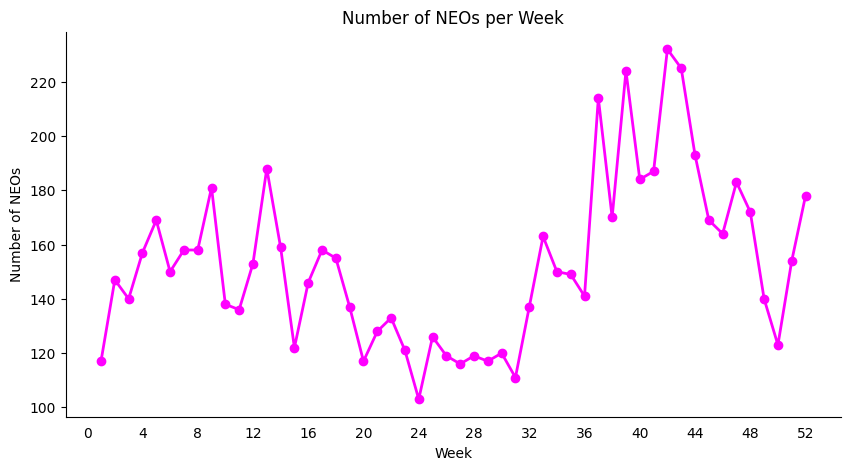

In [15]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store the count of NEOs per week
neos_per_week = {}

# Iterate over the data and count NEOs per week
for d in data:
    near_earth_objects = d['near_earth_objects']
    for date in near_earth_objects:
        week = datetime.strptime(date, '%Y-%m-%d').isocalendar()[1]
        if week in neos_per_week:
            neos_per_week[week] += len(near_earth_objects[date])
        else:
            neos_per_week[week] = len(near_earth_objects[date])

# Sort the dictionary by week numbers
sorted_neos_per_week = sorted(neos_per_week.items())

# Extract the week numbers and corresponding NEO counts
weeks, neo_counts = zip(*sorted_neos_per_week)

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(weeks, neo_counts, marker='o', color='magenta', linestyle='-', linewidth=2)
plt.xlabel('Week')
plt.ylabel('Number of NEOs')
plt.title('Number of NEOs per Week')
plt.xticks(range(0, 53, 4))
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.show()


#### - Create a histogram of the distribution of NEO sizes.

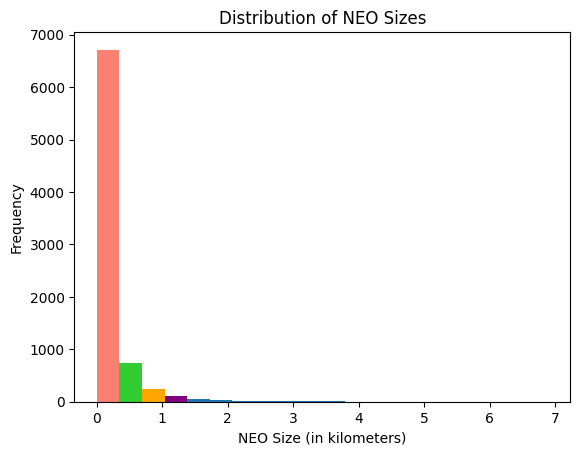

In [17]:
# Extract NEO sizes from the dataset
sizes = []
for d in data:
    for date in d['near_earth_objects']:
        for neo in d['near_earth_objects'][date]:
            sizes.append(neo['estimated_diameter']['kilometers']['estimated_diameter_max'])

# Define custom colors for the histogram bars
colors = [ 'salmon', 'limegreen', 'orange', 'purple']

# Plot the histogram
n, bins, patches = plt.hist(sizes, bins=20)

# Set custom colors for the histogram bars
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel('NEO Size (in kilometers)')
plt.ylabel('Frequency')
plt.title('Distribution of NEO Sizes')

plt.show()


#### - Create a bar plot of the average NEO size per week.

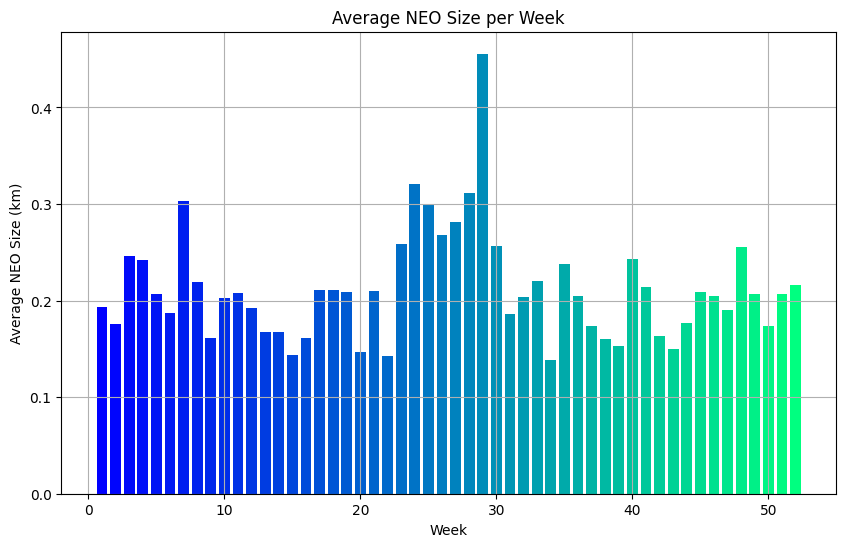

In [18]:
import numpy as np
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by week and calculate the average NEO size per week
weekly_neo_avg_size = df.groupby(df['Date'].dt.isocalendar().week)['NEO Size (km)'].mean()

# Create a colormap with rainbow colors
num_weeks = len(weekly_neo_avg_size)
colors = plt.cm.winter(np.linspace(0, 1, num_weeks))

# Create a bar plot of the average NEO size per week with rainbow colors
plt.figure(figsize=(10, 6))
plt.bar(weekly_neo_avg_size.index, weekly_neo_avg_size.values, color=colors)
plt.xlabel('Week')
plt.ylabel('Average NEO Size (km)')
plt.title('Average NEO Size per Week')
plt.grid(True)
plt.show()


#### - Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

DayOfWeek  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Week                                                                     
1              14        9         15        20      18        26      15
2              15       20         21        20      17        36      18
3              24       16         10        22      19        28      21
4              21       19         18        19      28        34      18
5              15       21         24        27      15        52      15
6              14       38         20        21      12        32      13
7              19       19         21        12      19        50      18
8              13       20         24        16      16        46      23
9              26       18         25        20      23        44      25
10             23       11         18        20      13        26      27
11             22       15         21        16      14        32      16
12             19       15         20 

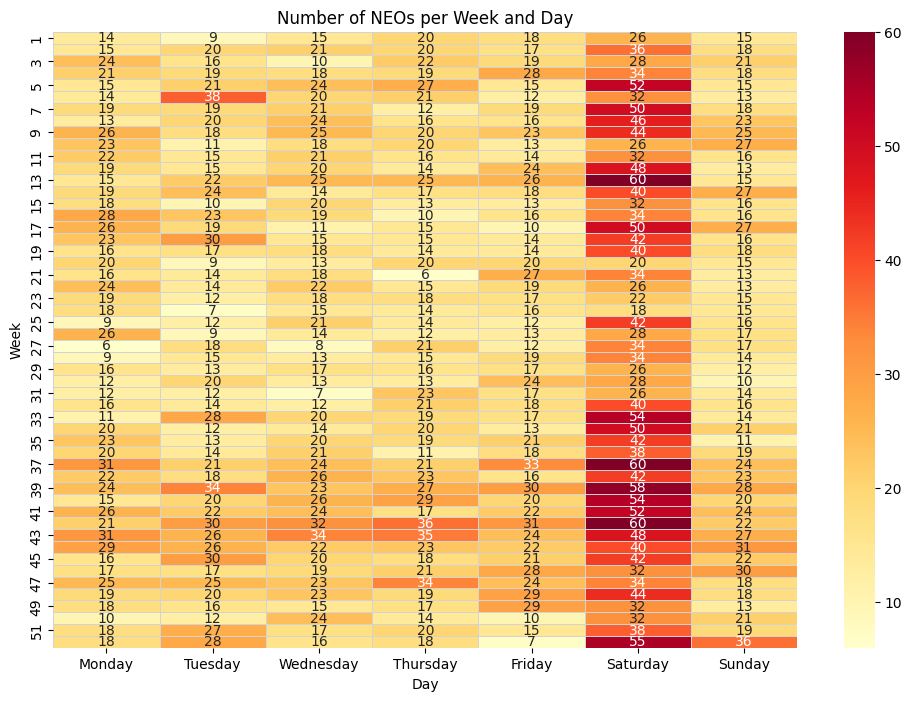

In [19]:
# we have refered to Deena, and she looked inside the code and couldent find any issue concerning rows showing on saturday.
# We have checked data and code several times to no avail.

import seaborn as sns

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the week number and day of the week from the 'Date' column
df['Week'] = df['Date'].dt.isocalendar().week
# Define the order of weekdays
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['Date'].dt.day_name(), categories=day_order, ordered=True)



# Pivot the data to create a matrix of the number of NEOs per week and day
neos_per_weekday = df.groupby(['Week', 'DayOfWeek']).size().unstack(fill_value=0)
print(neos_per_weekday)

# Create a custom color palette
colors = sns.color_palette('YlOrRd', as_cmap=True)

# Create the complex heat map with the specified weekday order
plt.figure(figsize=(12, 8))
sns.heatmap(neos_per_weekday, cmap=colors, annot=True, fmt='g', cbar=True, linewidths=0.5, linecolor='lightgray', )
plt.xlabel('Day')
plt.ylabel('Week')
plt.title('Number of NEOs per Week and Day')
plt.show()

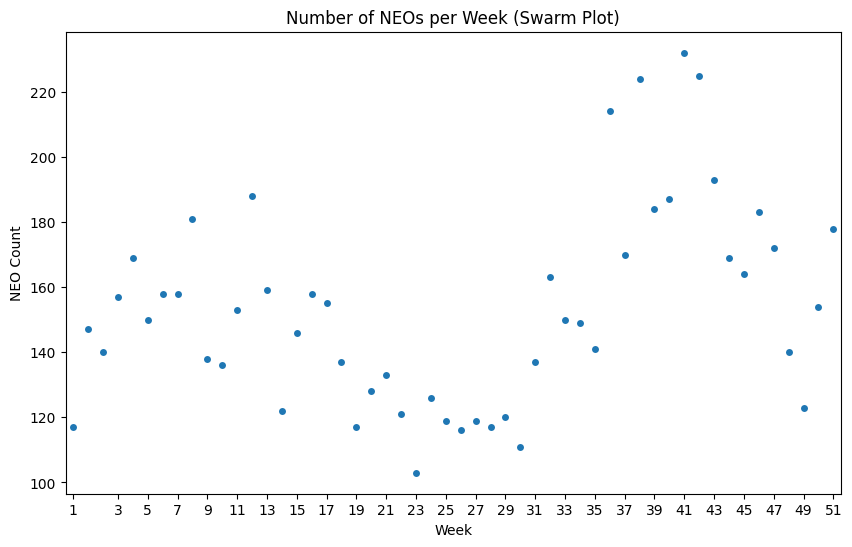

In [20]:
import seaborn as sns

# Initialize a dictionary to store the count of NEOs per week
neos_per_week = {}

# Iterate over the data and count NEOs per week
for d in data:
    near_earth_objects = d['near_earth_objects']
    for date in near_earth_objects:
        week = datetime.strptime(date, '%Y-%m-%d').isocalendar()[1]
        if week in neos_per_week:
            neos_per_week[week] += len(near_earth_objects[date])
        else:
            neos_per_week[week] = len(near_earth_objects[date])

# Create a DataFrame from the dictionary
df_neos_per_week = pd.DataFrame.from_dict(neos_per_week, orient='index', columns=['NEO Count'])
df_neos_per_week = df_neos_per_week.reset_index().rename(columns={'index': 'Week'})

# Sort the DataFrame by week number
df_neos_per_week = df_neos_per_week.sort_values('Week')

# Create a Swarm Plot of the number of NEOs per week
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_neos_per_week, x='Week', y='NEO Count')
plt.xlabel('Week')
plt.ylabel('NEO Count')
plt.title('Number of NEOs per Week (Swarm Plot)')
plt.xticks(df_neos_per_week.index[::2], df_neos_per_week['Week'].values[::2])
plt.show()


_________________________________________

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

In [21]:
proportions = df['Is Potentially Hazardous'].value_counts(normalize=True)


In [22]:
proportions = df['Is Potentially Hazardous'].value_counts(normalize=True)
import plotly.graph_objects as go

data = df['Is Potentially Hazardous'].value_counts(normalize=True)

labels = ['Non-Hazardous', 'Hazardous']
colors = ['#008000', '#FF0000']
explode = [0, 0.2]  # Explode the second slice (Hazardous)

fig = go.Figure(data=[go.Pie(labels=labels, values=data, hole=0.3,
                        hoverinfo='label+percent', textinfo='percent',
                        marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                        pull=explode)])

fig.update_layout(title='Proportions of Hazardous & Non-Hazardous Near-Earth Objects.',
                legend=dict(itemsizing='constant'))

fig.show()

In [23]:
import pandas as pd
import plotly.graph_objects as go

# Sample data
df['Close Approach Distance (km)'] = df['Close Approach Distance (km)'].replace(',', '', regex=True).astype(float)
df['NEO Size (km)'] = df['NEO Size (km)'].replace(',', '', regex=True).astype(float)
neo_sizes = df['NEO Size (km)']
close_distances = df['Close Approach Distance (km)']
neo_names = df['NEO Name']
is_hazardous = df['Is Potentially Hazardous']

# Convert boolean values to numerical values (0 for False, 1 for True)
color_values = is_hazardous.astype(int)

# Create the scatter plot for hazardous points
scatter_hazardous = go.Scatter(
    y=close_distances[is_hazardous],
    x=neo_sizes[is_hazardous],
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.7,
        color='red'  # Set the color to red for hazardous points
    ),
    text=neo_names[is_hazardous],
    hovertemplate=
    '<b>NEO Name:</b> %{text}<br>'
    '<b>NEO Size (km):</b> %{x}<br>'
    '<b>Proximity (km):</b> %{y}<br>'
    '<b>Is Potentially Hazardous:</b> True<br>'
    '<extra></extra>'
)

# Create the scatter plot for non-hazardous points
scatter_non_hazardous = go.Scatter(
    y=close_distances[~is_hazardous],
    x=neo_sizes[~is_hazardous],
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.7,
        color='green'  # Set the color to green for non-hazardous points
    ),
    text=neo_names[~is_hazardous],
    hovertemplate=
    '<b>NEO Name:</b> %{text}<br>'
    '<b>NEO Size (km):</b> %{x}<br>'
    '<b>Proximity (km):</b> %{y}<br>'
    '<b>Is Potentially Hazardous:</b> False<br>'
    '<extra></extra>'
)

# Create the scatter plot for both hazardous and non-hazardous points
scatter_both = go.Scatter(
    y=close_distances,
    x=neo_sizes,
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.7,
        color=color_values,
        colorscale=[[0, 'green'], [1, 'red']],
        cmin=0,
        cmax=1
    ),
    text=neo_names,
    hovertemplate=
    '<b>NEO Name:</b> %{text}<br>'
    '<b>NEO Size (km):</b> %{x}<br>'
    '<b>Proximity (km):</b> %{y}<br>'
    '<b>Is Potentially Hazardous:</b> %{marker.color}<br>'
    '<extra></extra>'
)

# Create the buttons for switching between overlays
buttons = [
    dict(
        label='Hazardous',
        method='update',
        args=[{'visible': [True, False, False]}]  # Show only the hazardous scatter plot
    ),
    dict(
        label='Non-Hazardous',
        method='update',
        args=[{'visible': [False, True, False]}]  # Show only the non-hazardous scatter plot
    ),
    dict(
        label='Both',
        method='update',
        args=[{'visible': [False, False, True]}]  # Show both scatter plots
    )
]

# Create the layout with buttons
layout = dict(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.2,
            yanchor='top'
        ),
    ],
    yaxis=dict(
        title='Proximity to earth (km)'
    ),
    xaxis=dict(
        title='Near-Earth Object Size in Km (Diameter)'
    ),
    height=800
)

# Create the figure with subplots
fig = go.Figure(data=[scatter_hazardous, scatter_non_hazardous, scatter_both], layout=layout)

# Update visibility for the initial plot
fig.update_layout(showlegend=False)
fig.update_traces(visible=False)

fig['data'][2]['visible'] = True  # Show the hazardous scatter plot initially

# Display the plot
fig.show()

_________________________________________________

### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B.
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

- #### <font color=green >Interpret the results of your data visualization in part A and B.</font>

- The first plot in Part A reveals that the Number of NEOs is highest between week 36 to week 45, indicating a peak in NEO activity from early September to mid-November. This could suggest a seasonal trend or specific astronomical events during that period that contribute to increased NEO sightings.</br>

- The majority (over 80%) of NEOs fall into the category of sizes less than 500 meters diameter, with the largest NEO observed measuring approximately 3.8 kilometers for diameter. This distribution highlights that smaller NEOs are more common, while larger ones are rarer.</br>

- Notably, the average NEO size peaked at around 0.48 kilometers during week 29. This suggests that there was a relatively larger NEO present during that time, potentially indicating an anomalous event or a specific NEO of significant size.</br>

- Approximately 77% of NEOs have an average size falling between 0.1 and 0.3 kilometers, emphasizing that NEOs in this range are the most frequently observed.</br></br>




- #### <font color=green > What insights can you gain about NEOs from your results? Summarizing your findings.</font>

- The second plot in Part B shows the proportions of Non-Hazardous and Hazardous NEOs. The data reveals that Non-Hazardous NEOs account for about 93.6% of the observed NEOs, while Hazardous NEOs make up around 6.4%. This distribution aligns with expectations, as most NEOs pose no immediate threat to Earth.</br>

- It can be inferred that a NEO's classification as hazardous is determined by a combination of factors, such as its size, speed, and proximity to Earth. The smaller proportion of Hazardous NEOs indicates that the majority of NEOs either do not possess these hazardous qualities or have orbits that keep them at a safe distance.</br>

- These findings emphasize the importance of considering both the size and speed of NEOs, as well as their proximity to Earth, when analyzing NEO data. This holistic approach is crucial for assessing the potential risks associated with NEOs and developing appropriate mitigation strategies.</br></br>




- #### <font color=green > Use your findings to make predictions or recommendations.</font>

- Based on the findings from the data visualization, several predictions and recommendations can be made:</br>

1. Allocation of Resources: Given that larger NEOs have the potential to be more hazardous, it is recommended to allocate more resources and funding towards tracking and monitoring larger NEOs. This could involve enhancing telescopic observation capabilities, investing in advanced detection technologies, and establishing dedicated programs to identify and track larger NEOs accurately. By doing so, we can improve our ability to assess potential risks and develop appropriate mitigation strategies.</br>

2. Early Warning Systems: With the understanding that the number of NEOs is highest between week 36 to week 45, it would be beneficial to develop early warning systems that focus on this specific time period. These systems could provide timely alerts and notifications to relevant authorities and stakeholders, allowing them to prepare for any potential NEO threats and take necessary precautions. This could involve coordinating with space agencies, astronomy organizations, and emergency management agencies to establish effective communication channels and protocols.</br>

3. Public Awareness and Education: Given that the majority of NEOs fall into the category of sizes less than 500 meters, it is important to increase public awareness and education about NEOs, their potential risks, and the ongoing efforts to track and monitor them. This could be achieved through educational campaigns, public lectures, and engaging with schools and educational institutions. By promoting awareness, we can foster a sense of preparedness and empower individuals and communities to take appropriate actions in the event of a potential NEO threat.</br>

4. Further Research: The insights gained from the data visualization present opportunities for further research in the field of NEOs. Researchers can delve deeper into the factors influencing the seasonal trends observed, study the characteristics of larger NEOs in more detail, and explore innovative methods for NEO detection and tracking. Continued research efforts will contribute to a better understanding of NEOs and enable more accurate predictions, ultimately leading to more effective strategies for NEO risk mitigation.</br></br>




- ####  <font color=green >  Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.</font>

Scientific Paper: "Clustering Near-Earth Objects by Orbital Similarity" by Alan Chamberlin and Steve Chesley.

* Justification:
This paper specifically addresses the clustering of Near-Earth Objects (NEOs) based on orbital similarity. Here's how the method discussed in the paper could contribute to the analysis and interpretation of NEO results:

* Orbital Similarity: The paper focuses on clustering NEOs based on their orbital elements, such as semi-major axis, eccentricity, inclination, and other parameters that describe their orbits around the Sun. By considering the orbital similarity, this method can identify groups of NEOs that share similar orbital characteristics.

* Identification of Dynamical Groups: Clustering NEOs based on orbital similarity can help in identifying dynamical groups or families of NEOs. These groups may have originated from common parent bodies or experienced similar dynamical influences in the past, providing insights into the NEO population's origin and evolution.
Visualization of Orbital Clusters: The clustering results can be visualized using graphical techniques, such as scatter plots or network graphs, to depict the relationships and distributions among NEOs in orbital parameter space. This visualization can aid in identifying clusters, outliers, and patterns within the NEO dataset.

* Implications for Hazard Assessment: Clustering NEOs based on orbital similarity can have implications for hazard assessment. NEOs within the same cluster may share similar potential impact characteristics, such as proximity to Earth or potential hazard level. By identifying clusters of potentially hazardous NEOs, resources for tracking, monitoring, and mitigation efforts can be better allocated.

By utilizing the method discussed in this paper, the analysis and visualization of NEOs can reveal insights into their orbital characteristics, grouping patterns, and potential hazard implications. This knowledge can be crucial for understanding the NEO population, predicting their future trajectories, and informing decision-making processes related to NEO monitoring and mitigation strategies.


_____________________________________________________________

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.